<a href="https://colab.research.google.com/github/newlei/TA/blob/master/demoTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A typically demo to structure basic consepts
Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:04, 42444516.33it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


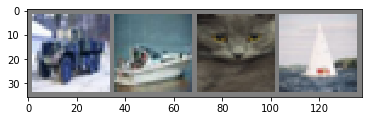

truck  ship   cat  ship


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
#Define a Convolutional Neural Network
'''
https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
torch.nn.Conv2d(in_channels, out_channels, kernel_size, 
stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

'''
import pdb
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 
net = Net()

#Define a Loss function and optimizer 

criterion = nn.CrossEntropyLoss()
#all optim https://pytorch.org/docs/stable/optim.html?highlight=optim#module-torch.optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)#, betas=(0.5, 0.99))



In [0]:
#train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.865
[1,  6000] loss: 1.700
[1,  8000] loss: 1.600
[1, 10000] loss: 1.534
[1, 12000] loss: 1.491
[2,  2000] loss: 1.432
[2,  4000] loss: 1.394
[2,  6000] loss: 1.394
[2,  8000] loss: 1.328
[2, 10000] loss: 1.319
[2, 12000] loss: 1.304
Finished Training


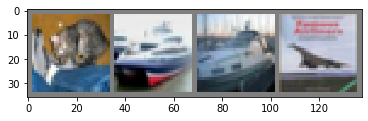

GroundTruth:    cat  ship  ship plane
Predicted:    cat plane   car  ship


In [0]:
#save model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
#Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1) 
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# 讲解dataloader部分

In [0]:
cd ./data

/content/data


In [0]:
!git clone  https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Counting objects: 100% (60027/60027), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 60027 (delta 59990), reused 60024 (delta 59990), pack-reused 0
Receiving objects: 100% (60027/60027), 19.94 MiB | 37.47 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Checking out files: 100% (60001/60001), done.


In [0]:
cd ..

/content


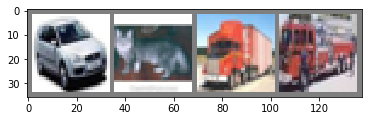

  car   cat truck truck
tensor([4, 0, 6, 6, 4, 7, 7, 3, 8, 7, 8, 1, 5, 4, 7, 5, 4, 2, 2, 1, 8, 5, 2, 1,
        7, 2, 8, 1, 1, 3, 3, 8, 1, 4, 5, 2, 6, 7, 4, 7, 8, 5, 0, 4, 1, 3, 4, 4,
        9, 3, 4, 9, 0, 3, 7, 2, 5, 7, 5, 9, 6, 9, 0, 1])


In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pdb

# dataset load
class MyDataset(Dataset):  
    def __init__(self, root_dir,istraining=True,transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        self.root_dir = root_dir
        self.istraining = istraining
        self.transform = transform
        self.classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        self.sampleAll=[] #each item is imgPtah and imgClass
                    
    
    def readAllPath(self): 
        for classImg in range(len(self.classes)) :
            classi=self.classes[classImg]
            classCurrentPath=self.root_dir+'/'+classi 
            classCurrent= os.listdir(classCurrentPath) #得到文件夹下的所有文件名称
            # classImg=self.classes[classi]
            for imgs in classCurrent: #遍历文件夹
                imgPath=classCurrentPath+'/'+imgs 
                self.sampleAll.append([imgPath,classImg])  
        #print(len(self.sampleAll))
     
    def __len__(self):
        if self.istraining:
            return 50000#len(self.landmarks_frame)
        else:
            return 10000

    def __getitem__(self, idx):
        imgP,imgC=self.sampleAll[idx]
        image = io.imread(imgP) 
        # sample = {'image': image, 'landmarks': landmarks} 
        if self.transform:
            image = self.transform(image)

        return image,imgC

# data_transform = transforms.Compose([
#         transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
#     ])
        
batch_size=64
train_dataset = MyDataset(root_dir= './data/CIFAR-10-images/train',istraining=True,transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset,
        batch_size=batch_size, shuffle=True, num_workers=2)
train_loader.dataset.readAllPath()

test_dataset = MyDataset(root_dir= './data/CIFAR-10-images/test',istraining=False,transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset,
        batch_size=batch_size, shuffle=True)
test_loader.dataset.readAllPath()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show() 
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


for i, data in enumerate(train_loader):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    print(inputs)
    break
    


#Complex CNN
Transfer learning:
https://cs231n.github.io/transfer-learning/


In [15]:
cd ./data

/content/data


In [14]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2019-11-14 03:01:22--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.84.74.83, 99.84.74.105, 99.84.74.5, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.84.74.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  40.3MB/s    in 1.1s    

2019-11-14 03:01:24 (40.3 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [0]:
!unzip hymenoptera_data.zip

In [18]:
cd ..

/content


In [0]:

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [0]:
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


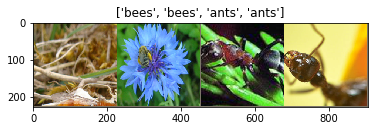

In [22]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

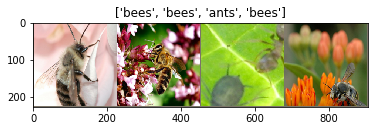

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 70.2MB/s]


Epoch 0/24
----------
train Loss: 0.5122 Acc: 0.7582
val Loss: 0.1954 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.5054 Acc: 0.8033
val Loss: 0.2249 Acc: 0.8889

Epoch 2/24
----------
train Loss: 0.4297 Acc: 0.8320
val Loss: 0.2097 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.5679 Acc: 0.7869
val Loss: 0.2405 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.6131 Acc: 0.7623
val Loss: 0.5041 Acc: 0.8497

Epoch 5/24
----------
train Loss: 0.4580 Acc: 0.8525
val Loss: 0.2435 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.5001 Acc: 0.8361
val Loss: 0.5966 Acc: 0.7843

Epoch 7/24
----------
train Loss: 0.4210 Acc: 0.7951
val Loss: 0.2872 Acc: 0.9020

Epoch 8/24
----------
train Loss: 0.4167 Acc: 0.7992
val Loss: 0.2368 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3458 Acc: 0.8443
val Loss: 0.2380 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.3176 Acc: 0.8607
val Loss: 0.2514 Acc: 0.9085

Epoch 11/24
----------
train Loss: 0.3037 Acc: 0.8811
val Loss: 0.2125 Acc: 0.9216

Ep

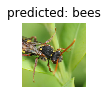

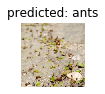

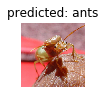

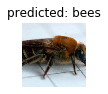

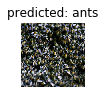

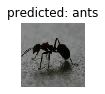

Epoch 0/24
----------
train Loss: 0.6579 Acc: 0.6803
val Loss: 0.7584 Acc: 0.6797

Epoch 1/24
----------
train Loss: 0.5425 Acc: 0.7295
val Loss: 0.2052 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.5104 Acc: 0.7828
val Loss: 0.4443 Acc: 0.8170

Epoch 3/24
----------
train Loss: 0.5286 Acc: 0.7787
val Loss: 0.2297 Acc: 0.9412

Epoch 4/24
----------
train Loss: 0.4917 Acc: 0.7910
val Loss: 0.5569 Acc: 0.8170

Epoch 5/24
----------
train Loss: 0.3740 Acc: 0.8402
val Loss: 0.3090 Acc: 0.8954

Epoch 6/24
----------
train Loss: 0.6099 Acc: 0.7295
val Loss: 0.3015 Acc: 0.9085

Epoch 7/24
----------
train Loss: 0.4173 Acc: 0.8238
val Loss: 0.2198 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.3585 Acc: 0.8443
val Loss: 0.2287 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.2966 Acc: 0.8648
val Loss: 0.2144 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3279 Acc: 0.8402
val Loss: 0.2041 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3619 Acc: 0.8443
val Loss: 0.2279 Acc: 0.9412

Ep

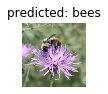

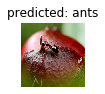

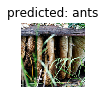

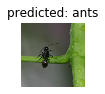

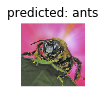

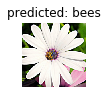

In [28]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

######################################################################
# Load Data
# ---------
#
# We will use torchvision and torch.utils.data packages for loading the
# data.
#
# The problem we're going to solve today is to train a model to classify
# **ants** and **bees**. We have about 120 training images each for ants and bees.
# There are 75 validation images for each class. Usually, this is a very
# small dataset to generalize upon, if trained from scratch. Since we
# are using transfer learning, we should be able to generalize reasonably
# well.
#
# This dataset is a very small subset of imagenet.
#
# .. Note ::
#    Download the data from
#    `here <https://download.pytorch.org/tutorial/hymenoptera_data.zip>`_
#    and extract it to the current directory.

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

######################################################################
# Visualize a few images
# ^^^^^^^^^^^^^^^^^^^^^^
# Let's visualize a few training images so as to understand the data
# augmentations.

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


######################################################################
# Training the model
# ------------------
#
# Now, let's write a general function to train a model. Here, we will
# illustrate:
#
# -  Scheduling the learning rate
# -  Saving the best model
#
# In the following, parameter ``scheduler`` is an LR scheduler object from
# ``torch.optim.lr_scheduler``.


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


######################################################################
# Visualizing the model predictions
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# Generic function to display predictions for a few images
#

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

######################################################################
# Finetuning the convnet
# ----------------------
#
# Load a pretrained model and reset final fully connected layer.
#

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

######################################################################
# Train and evaluate
# ^^^^^^^^^^^^^^^^^^
#
# It should take around 15-25 min on CPU. On GPU though, it takes less than a
# minute.
#

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

######################################################################
#

visualize_model(model_ft)


######################################################################
# ConvNet as fixed feature extractor
# ----------------------------------
#
# Here, we need to freeze all the network except the final layer. We need
# to set ``requires_grad == False`` to freeze the parameters so that the
# gradients are not computed in ``backward()``.
#
# You can read more about this in the documentation
# `here <https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward>`__.
#

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


######################################################################
# Train and evaluate
# ^^^^^^^^^^^^^^^^^^
#
# On CPU this will take about half the time compared to previous scenario.
# This is expected as gradients don't need to be computed for most of the
# network. However, forward does need to be computed.
#

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

######################################################################
#

visualize_model(model_conv)

plt.ioff()
plt.show()